In [2]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# defualt
# df = pd.read_csv('./bank.csv')
# df=df.drop(columns=['month','day'])
# df=df.drop_duplicates()
# df = pd.get_dummies(df)
# This line is not neccessary; you can go as you wish to achieve the best result you can.
# df = df.drop(columns=['default_no', 'housing_no', 'loan_no', 'deposit_no'])

# df.head(5).T

In [32]:
df = pd.read_csv('./bank+marketing/bank/bank-full.csv', sep=';')
df.drop(columns=['month', 'day'], inplace=True)
df.drop_duplicates(inplace=True)
df.replace('unknown', np.nan, inplace=True)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,198,1,-1,0,NaN,no


In [6]:
df.shape

(45210, 15)

In [7]:
# Display Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45210 non-null  int64 
 1   job        44922 non-null  object
 2   marital    45210 non-null  object
 3   education  43353 non-null  object
 4   default    45210 non-null  object
 5   balance    45210 non-null  int64 
 6   housing    45210 non-null  object
 7   loan       45210 non-null  object
 8   contact    32190 non-null  object
 9   duration   45210 non-null  int64 
 10  campaign   45210 non-null  int64 
 11  pdays      45210 non-null  int64 
 12  previous   45210 non-null  int64 
 13  poutcome   8252 non-null   object
 14  y          45210 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [8]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
duration         0
campaign         0
pdays            0
previous         0
poutcome     36958
y                0
dtype: int64

In [9]:
# Summary Statistics
df.describe()

,age,balance,duration,campaign,pdays,previous
count,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000
mean,40.935921,1362.302190,258.164057,2.763835,40.198739,0.580336
std,10.618702,3044.792762,257.530577,3.098055,100.129666,2.303465
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


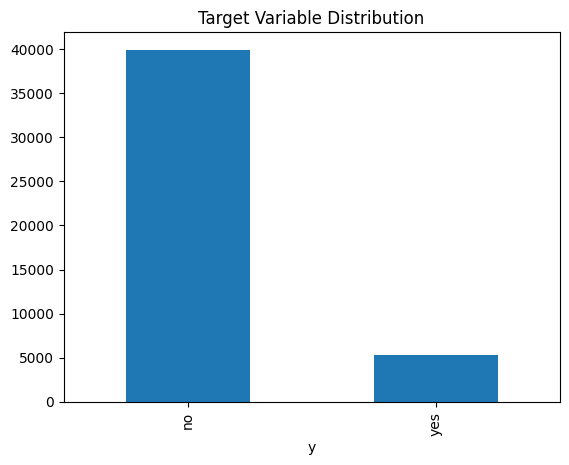

In [10]:
# Distribution of target variable
df['y'].value_counts().plot(kind='bar', title='Target Variable Distribution')
plt.show()

In [33]:
# X = df.drop('deposit_yes', axis=1)
# y = df['deposit_yes']
# X.shape, y.shape

X = df.drop('y', axis=1)
y = df['y']
X.shape, y.shape

((45210, 14), (45210,))

## Exploratory Data Analysis (EDA)

**Tasks:**

1. Check Summary Statistics for the Dataset
2. Check Distribution Of Classes
3. Check Correlation Matrix
4. Check For Outliers
5. Visualize Data After Dimension Reduction


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45210 non-null  int64 
 1   job        44922 non-null  object
 2   marital    45210 non-null  object
 3   education  43353 non-null  object
 4   default    45210 non-null  object
 5   balance    45210 non-null  int64 
 6   housing    45210 non-null  object
 7   loan       45210 non-null  object
 8   contact    32190 non-null  object
 9   duration   45210 non-null  int64 
 10  campaign   45210 non-null  int64 
 11  pdays      45210 non-null  int64 
 12  previous   45210 non-null  int64 
 13  poutcome   8252 non-null   object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [13]:
#  TODO: 
X.describe()

,age,balance,duration,campaign,pdays,previous
count,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000
mean,40.935921,1362.302190,258.164057,2.763835,40.198739,0.580336
std,10.618702,3044.792762,257.530577,3.098055,100.129666,2.303465
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


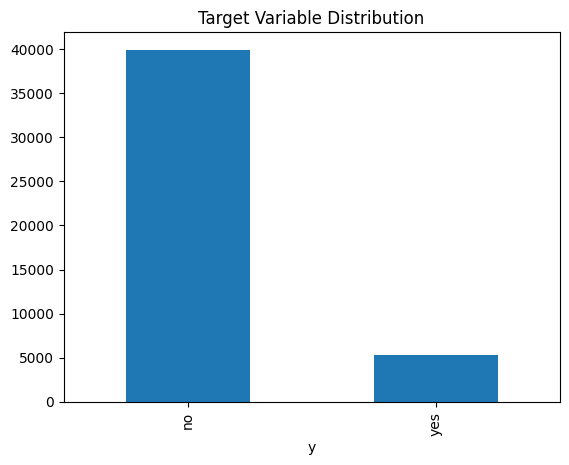

In [14]:
#  TODO: 
# Distribution of target variable
y.value_counts().plot(kind='bar', title='Target Variable Distribution')
plt.show()

In [34]:
#  TODO: Check for class imbalance
print("\nClass Distribution:\n", y.value_counts())
print(y.value_counts(normalize=True))


Class Distribution:
 y
no     39921
yes     5289
Name: count, dtype: int64
y
no     0.883013
yes    0.116987
Name: proportion, dtype: float64


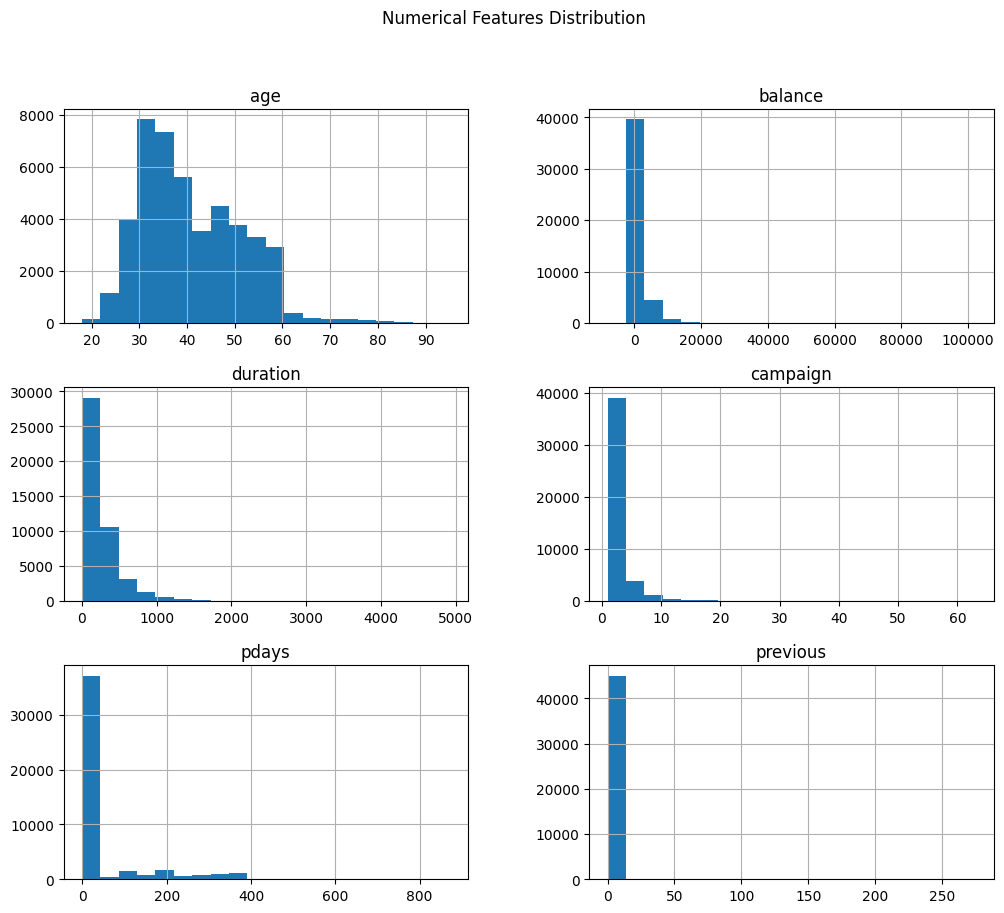

In [16]:
# Visualize numerical features
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.hist(figsize=(12, 10), bins=20)
plt.suptitle("Numerical Features Distribution")
plt.show()

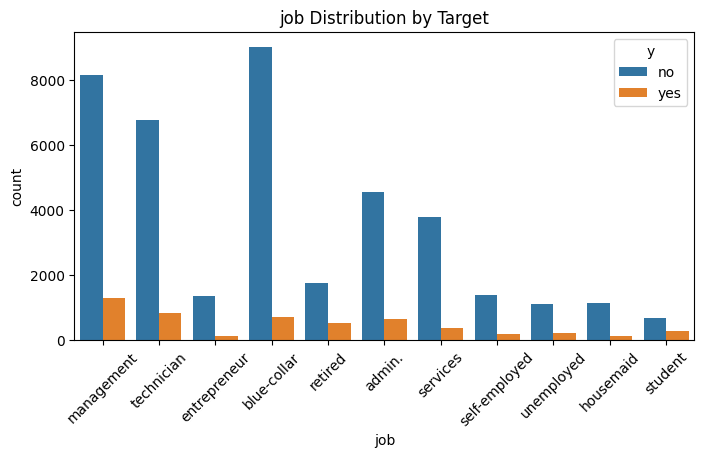

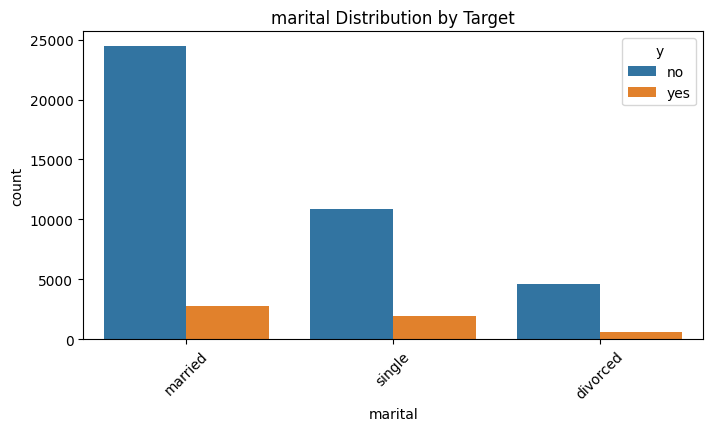

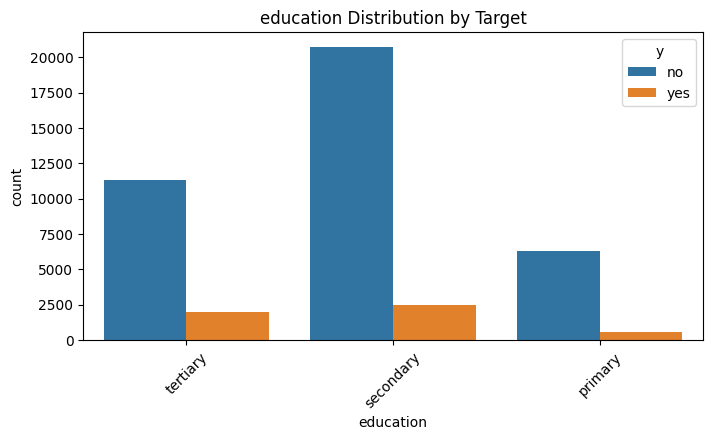

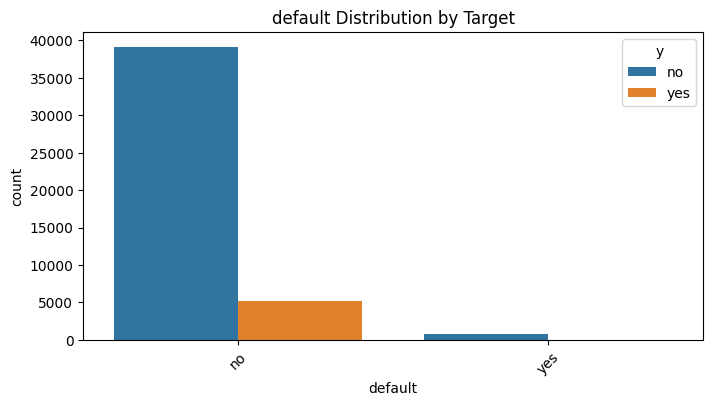

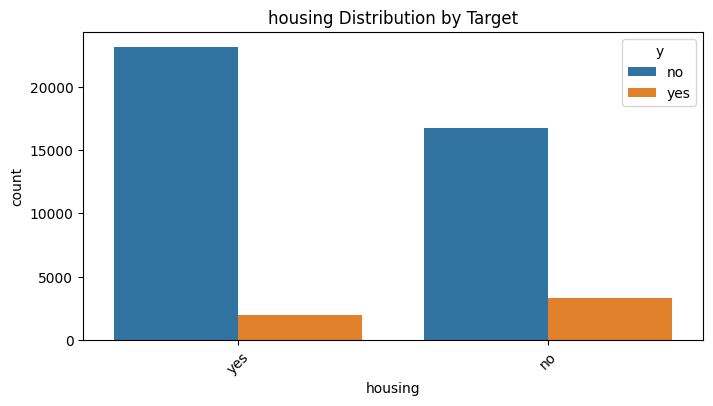

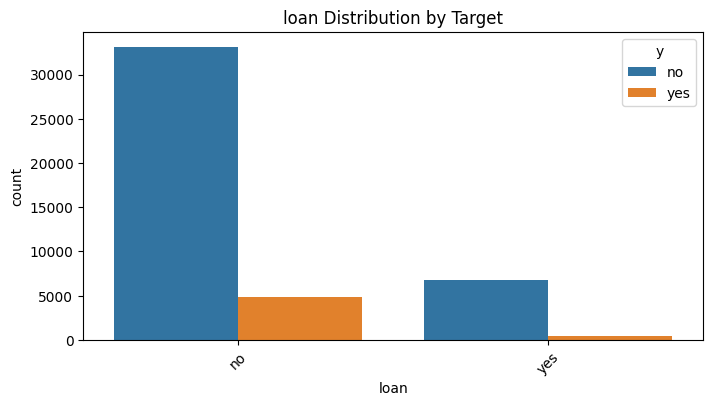

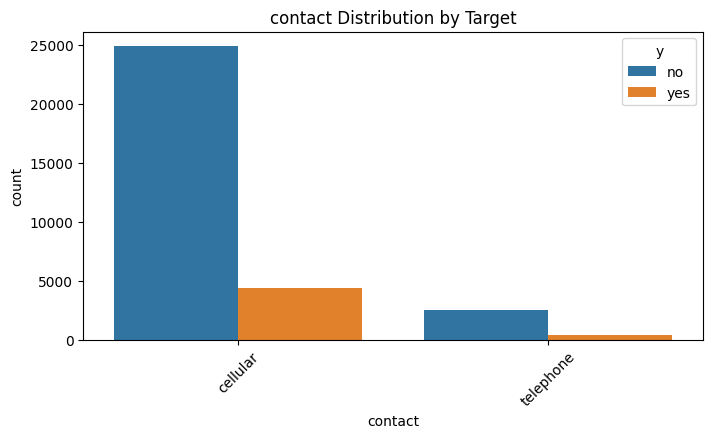

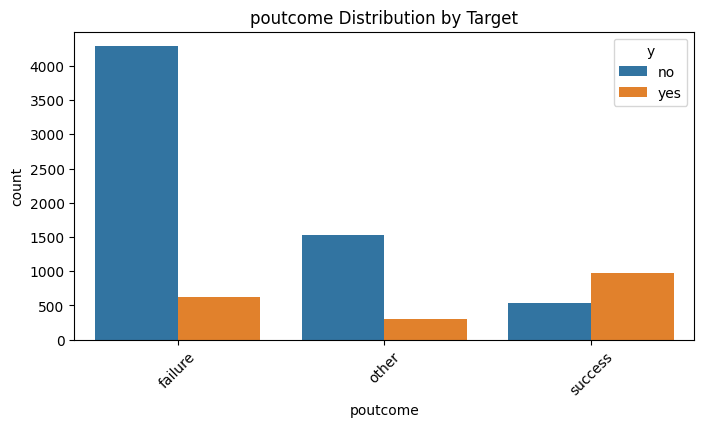

In [17]:
# Categorical variable distributions
categorical_features = df.select_dtypes(include=['object']).columns.drop('y')
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], hue=df['y'])
    plt.xticks(rotation=45)
    plt.title(f"{col} Distribution by Target")
    plt.show()

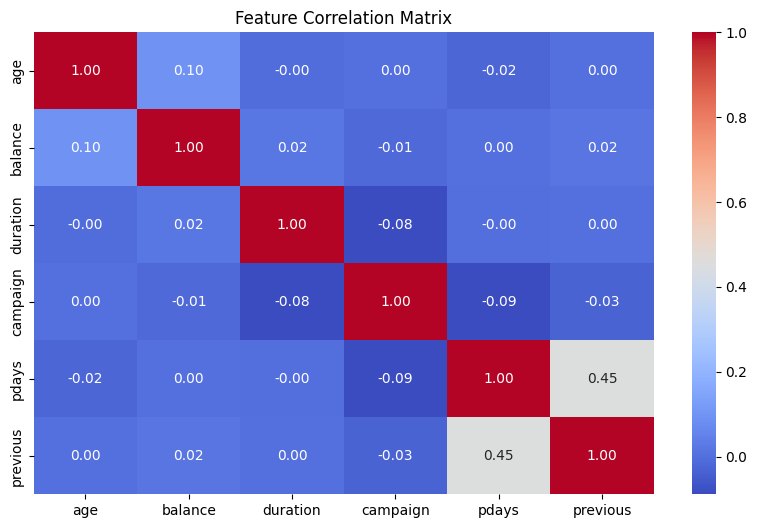

In [ ]:
#  TODO:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

<Axes: >

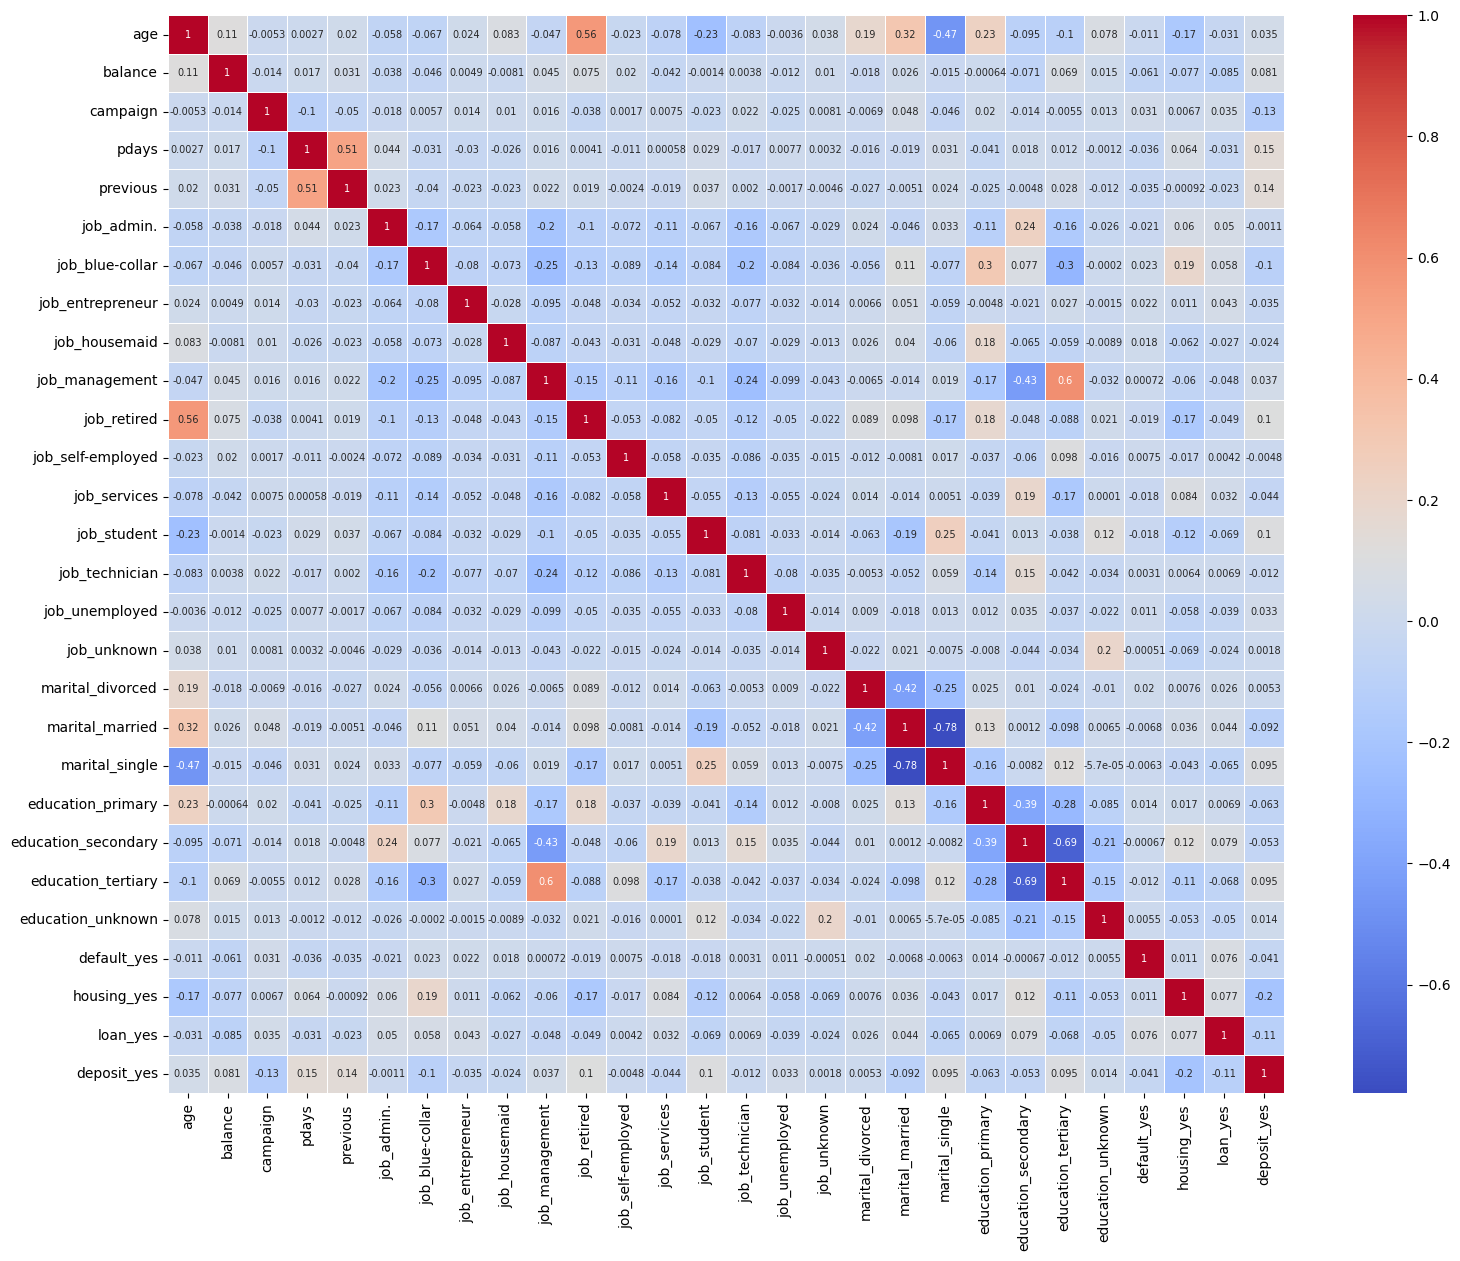

In [ ]:
#  TODO: 


In [66]:
# Standardizing numeric features

scaler = StandardScaler()
X = scaler.fit_transform(numeric_features.dropna())
y = df['y'].dropna()

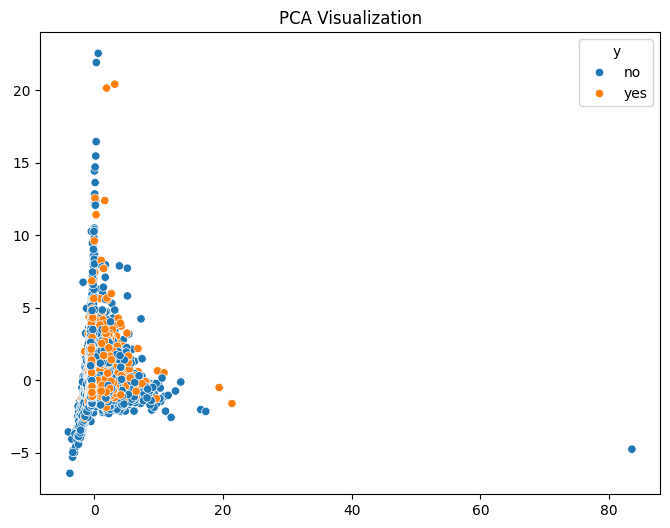

In [20]:
#  TODO: Data visualization after applying PCA 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title("PCA Visualization")
plt.show()

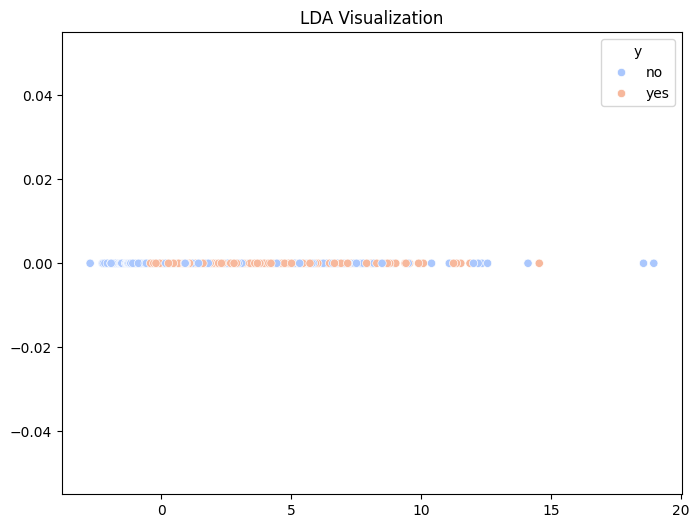

In [21]:
#  TODO: Data visualization after applying LDA 
num_classes = len(np.unique(y))
n_components_lda = min(len(numeric_features.columns), num_classes - 1)
if n_components_lda > 0:
    lda = LDA(n_components=n_components_lda)
    X_lda = lda.fit_transform(X, y)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1] if n_components_lda > 1 else np.zeros_like(X_lda[:, 0]), hue=y, palette='coolwarm')
    plt.title("LDA Visualization")
    plt.show()
else:
    print("LDA visualization skipped due to insufficient class variation.")

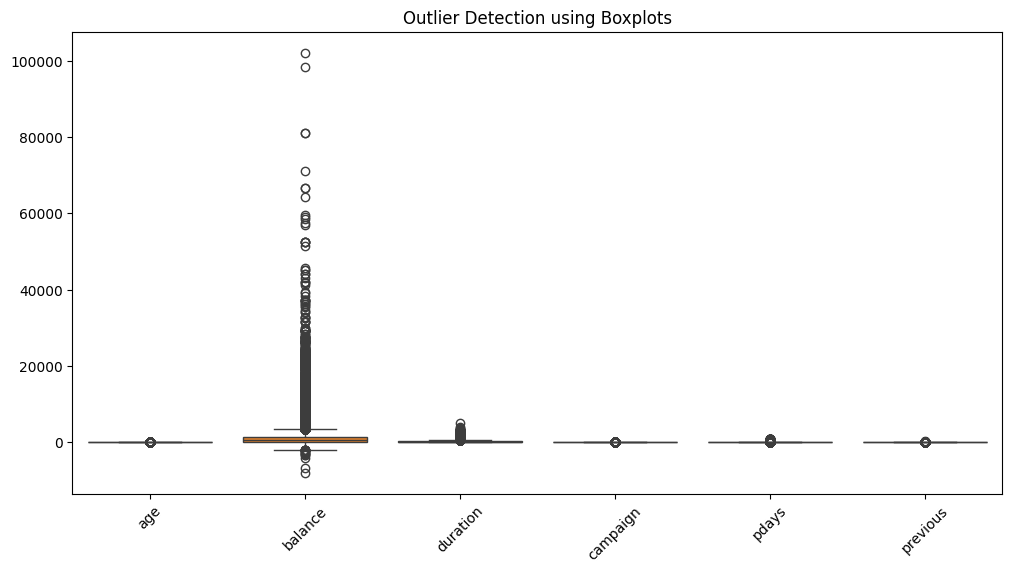

In [35]:
# Outlier detection using IQR
Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_features < (Q1 - 1.5 * IQR)) | (numeric_features > (Q3 + 1.5 * IQR)))
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_features)
plt.xticks(rotation=45)
plt.title("Outlier Detection using Boxplots")
plt.show()

## Preprocess

In [36]:
# Handle missing values
categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

numeric_features = df.select_dtypes(include=[np.number])
num_imputer = SimpleImputer(strategy='mean')
df[numeric_features.columns] = num_imputer.fit_transform(numeric_features)

In [24]:
# Encode target variable
y = LabelEncoder().fit_transform(df['y'])
df.drop(columns=['y'], inplace=True)

In [37]:
# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_features.drop('y')]))
categorical_encoded.columns = encoder.get_feature_names_out(categorical_features.drop('y'))
df = df.drop(columns=categorical_features.drop('y')).join(categorical_encoded)

In [38]:
df.head()

,age,balance,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,poutcome_other,poutcome_success
0,58.0,2143.0,261.0,1.0,-1.0,0.0,no,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,44.0,29.0,151.0,1.0,-1.0,0.0,no,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,33.0,2.0,76.0,1.0,-1.0,0.0,no,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,47.0,1506.0,92.0,1.0,-1.0,0.0,no,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,33.0,1.0,198.0,1.0,-1.0,0.0,no,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45210 entries, 0 to 45210
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45210 non-null  float64
 1   balance              45210 non-null  float64
 2   duration             45210 non-null  float64
 3   campaign             45210 non-null  float64
 4   pdays                45210 non-null  float64
 5   previous             45210 non-null  float64
 6   y                    45210 non-null  object 
 7   job_blue-collar      45209 non-null  float64
 8   job_entrepreneur     45209 non-null  float64
 9   job_housemaid        45209 non-null  float64
 10  job_management       45209 non-null  float64
 11  job_retired          45209 non-null  float64
 12  job_self-employed    45209 non-null  float64
 13  job_services         45209 non-null  float64
 14  job_student          45209 non-null  float64
 15  job_technician       45209 non-null  floa

In [41]:
df.isnull().sum()

age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_blue-collar        1
job_entrepreneur       1
job_housemaid          1
job_management         1
job_retired            1
job_self-employed      1
job_services           1
job_student            1
job_technician         1
job_unemployed         1
marital_married        1
marital_single         1
education_secondary    1
education_tertiary     1
default_yes            1
housing_yes            1
loan_yes               1
contact_telephone      1
poutcome_other         1
poutcome_success       1
dtype: int64

In [58]:
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X = imputer.fit_transform(X)
X = X[~np.isnan(X).any(axis=1)]

In [59]:
X = df.drop('y', axis=1)

In [60]:
# TODO: Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [71]:
# TODO: Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

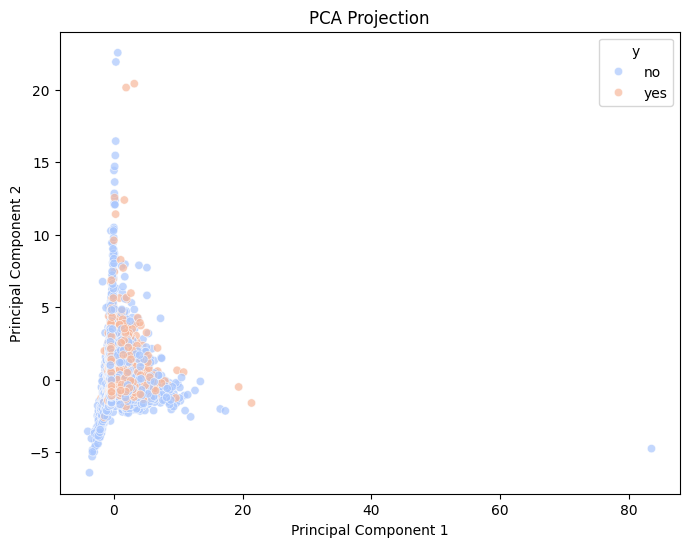

In [64]:
# TODO: Adopt Dimensionality Reduction
# Feel free to use any dimensionality reduction technique you have learned so far.

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [ ]:
# Feel free to leverage any further preprocessing techniques you have learned so far.

# from imblearn.over_sampling import SMOTE

# # Handle class imbalance with SMOTE
# smote = SMOTE(random_state=42)
# X, y = smote.fit_resample(X, y)

In [69]:
print(np.isnan(X).sum())  # Before cleaning

0


## Learning Models

### SVM

In [72]:
# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [ ]:
kf = KFold(n_splits= 5)
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# TODO: Train and evaluate the model using KFold cross-validation and SVM
#   Use the following metrics to evaluate the model: ROC, Precision, Recall, F1, Accuracy

print('Average of Accuracy: ', np.mean(accuracy), ' STD: ', np.std(accuracy))
print('Average of Precision: ', np.mean(precision), ' STD: ', np.std(precision))
print('Average of Recall: ', np.mean(recall), ' STD: ', np.std(recall))
print('Average of F1: ', np.mean(f1), ' STD: ', np.std(f1))



ValueError: pos_label=1 is not a valid label. It should be one of ['no', 'yes']

### Ensemble Learning

In [ ]:
kf = KFold(n_splits= 5)

precision = []
recall = []
f1 = []
accuracy = []


# TODO: Train and evaluate the model using KFold cross-validation and Ensemble Learning
#   Use the following metrics to evaluate the model: ROC, Precision, Recall, F1, Accuracy

print('Average of Accuracy: ', np.mean(accuracy), ' STD: ', np.std(accuracy))
print('Average of Precision: ', np.mean(precision), ' STD: ', np.std(precision))
print('Average of Recall: ', np.mean(recall), ' STD: ', np.std(recall))
print('Average of F1: ', np.mean(f1), ' STD: ', np.std(f1))



Average of Accuracy:  0.6704259268384829  STD:  0.01184398761436436
Average of Precision:  0.7092829043099574  STD:  0.014845318719730681
Average of Recall:  0.5121207465519494  STD:  0.019882751788762816
Average of F1:  0.5943176108266884  STD:  0.010000997565520009


### Manually Combined Model

### Test Set

              precision    recall  f1-score   support

       False       0.65      0.71      0.68      1740
        True       0.65      0.58      0.61      1605

    accuracy                           0.65      3345
   macro avg       0.65      0.64      0.64      3345
weighted avg       0.65      0.65      0.65      3345

ROC:  0.6447980449027823
Accuracy:  0.6472346786248132


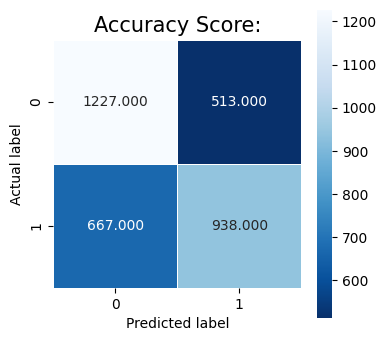

In [26]:
#  TODO: Apply the best model to the test set and evaluate the model